In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np

In [2]:
df = pd.read_csv (r'stops.csv')

filename = 'stops.csv'
with open('stops.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
#To display the headers to find correct vales to call min and max
print(header_row)
print("This is the total number of rows in the file:", '\n' ,len(df))

['\ufeffTYPE_OF_STOP', 'CITATION_CONTROL_NUMBER', 'ACTIVITY_RESULTS', 'OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE', 'ACTIVITY_DATE', 'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'DRIVER_GENDER', 'DRIVER_RACE', 'DRIVER_AGE_RANGE', 'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH', 'ObjectId']
This is the total number of rows in the file: 
 23543


In [3]:
df.drop(columns=['CITATION_CONTROL_NUMBER', 'ACTIVITY_DATE', 'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH', 'ObjectId'], inplace=True)
df.rename(columns={'TYPE_OF_STOP':'stop', 'ACTIVITY_RESULTS':'action', 'OFFICER_GENDER':'o_gender', 'OFFICER_RACE':"o_race", 'OFFICER_AGE_RANGE':"o_age", 'DRIVER_GENDER':'d_gender', 'DRIVER_RACE':"d_race", 'DRIVER_AGE_RANGE':"d_age"}, inplace=True)
df.head()

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age
0,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,16 - 19
1,TRAFFIC VIOLATION,CITATION ISSUED,F,WHITE,21 - 30,M,WHITE,16 - 19
2,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,31 - 40
3,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25
4,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25


In [4]:
df.o_race.unique()

array(['WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'UNKNOWN'], dtype=object)

In [5]:
df3 = pd.read_csv (r'employee.csv')

filename = 'employee.csv'
with open('employee.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
#To display the headers to find correct vales to call min and max
print(header_row)
print("This is the total number of rows in the file:", '\n' ,len(df))
df3.head()

['\ufeffAOC_CODE', 'RANK_TITLE', 'OFFICER_SEX', 'OFFICER_RACE', 'OFFICER_AGE_RANGE', 'OFFICER_AGE', 'OFFICER_DIVISION', 'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId']
This is the total number of rows in the file: 
 23543


,AOC_CODE,RANK_TITLE,OFFICER_SEX,OFFICER_RACE,OFFICER_AGE_RANGE,OFFICER_AGE,OFFICER_DIVISION,OFFICER_ASSIGNMENT,OFFICER_YEARS_SWORN,ObjectId
0,2151,POLICE OFFICER,F,W,40 - 49,47,6TH DIVISION ...,RESOURCE OFFICERS ...,23,1
1,2440,POLICE OFFICER,M,W,40 - 49,48,1ST DIVISION ...,DETECTIVES ...,19,2
2,2016,POLICE SERGEANT,M,A,40 - 49,49,TECHNICAL SERVICES ...,TECHNICAL SERVICES ...,23,3
3,2092,POLICE OFFICER,M,W,50 - 59,51,TRAINING ...,SPECIAL PROJECTS UNIT ...,23,4
4,2208,POLICE OFFICER,M,W,OVER 60,60,FORMER EMPLOYEE ...,NaN,34,5


In [6]:
df3.drop(columns=['AOC_CODE', 'RANK_TITLE', 'OFFICER_DIVISION', 'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId'], inplace=True)
df3.rename(columns={'OFFICER_SEX':'oh_sex', 'OFFICER_RACE':'oh_race', 'OFFICER_AGE_RANGE':'oh_age_range', 'OFFICER_AGE':"oh_age"}, inplace=True)
df3.head()


,oh_sex,oh_race,oh_age_range,oh_age
0,F,W,40 - 49,47
1,M,W,40 - 49,48
2,M,A,40 - 49,49
3,M,W,50 - 59,51
4,M,W,OVER 60,60


In [7]:
df3.oh_race.unique()

array(['W ', 'A ', 'B ', 'H ', 'U ', '  '], dtype=object)

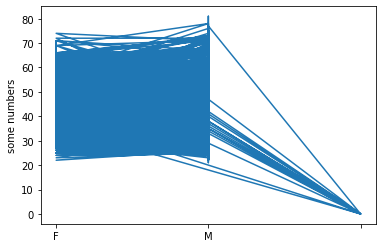

In [8]:
plt.plot(df3['oh_sex'], df3['oh_age'])
plt.ylabel('some numbers')
plt.show()

In [9]:
print("The mean officer age is:", df3['oh_age'].mean())
print("The max officer age is:", df3['oh_age'].max())
print("The min officer age is:", df3['oh_age'].min())


The mean officer age is: 45.047441165483754
The max officer age is: 81
The min officer age is: 0


In [10]:
# result =  pd.concat([df, df3], ignore_index=True, sort= False)

# print(result.head())

In [11]:
df4 =  pd.concat([df, df3], axis = 1, join="inner")
df4.head()
# print(header_row)

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
0,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,16 - 19,F,W,40 - 49,47
1,TRAFFIC VIOLATION,CITATION ISSUED,F,WHITE,21 - 30,M,WHITE,16 - 19,M,W,40 - 49,48
2,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,31 - 40,M,A,40 - 49,49
3,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,50 - 59,51
4,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,OVER 60,60


In [12]:
df4['o_gender'] = df4['o_gender'].fillna('unknown')
df4.head()

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
0,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,16 - 19,F,W,40 - 49,47
1,TRAFFIC VIOLATION,CITATION ISSUED,F,WHITE,21 - 30,M,WHITE,16 - 19,M,W,40 - 49,48
2,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,31 - 40,M,A,40 - 49,49
3,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,50 - 59,51
4,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,OVER 60,60


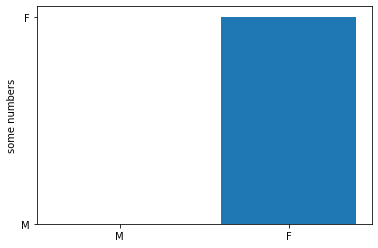

In [13]:
plt.bar(df4['o_gender'], df4['o_gender'])
plt.ylabel('some numbers')
plt.show()

In [15]:
df3.oh_sex.unique()


array(['F', 'M', ' '], dtype=object)

In [19]:
df4.groupby(by='oh_age')
df4.head(30)

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
0,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,16 - 19,F,W,40 - 49,47
1,TRAFFIC VIOLATION,CITATION ISSUED,F,WHITE,21 - 30,M,WHITE,16 - 19,M,W,40 - 49,48
2,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,31 - 40,M,A,40 - 49,49
3,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,50 - 59,51
4,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,OVER 60,60
5,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,WHITE,26 - 30,M,B,50 - 59,56
6,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,BLACK,31 - 40,M,W,40 - 49,43
7,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,20 - 25,M,W,OVER 60,60
8,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,20 - 25,M,W,OVER 60,68
9,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,41 - 50,M,WHITE,31 - 40,M,W,50 - 59,53


In [20]:
# plot = df4.plot.pie(y='oh_age', figsize=(5, 5), subplots=True)
# this plots every line indv 




In [27]:
sum(df4.oh_sex == 'M')

2282

In [26]:
sum(df4.oh_sex == 'F')

384

(2282, 384)


NameError: name 'plot' is not defined